In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from matplotlib import pyplot as plt

<h2>Check Data</h2>

In [17]:
#download nltk punkt
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\danni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danni\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
#check some data
df = pd.read_csv('./data/labeled.csv', sep=',')

In [4]:
df.shape

(14412, 2)

In [5]:
df.head(3)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\r\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\r\n,1.0


In [6]:
df['toxic'].value_counts()

toxic
0.0    9586
1.0    4826
Name: count, dtype: int64

In [7]:
for comment in df[df['toxic'] == 1.0]['comment'].head(3):
    print(comment)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть



In [8]:
for comment in df[df['toxic'] == 0.0]['comment'].head(3):
    print(comment)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

<h2> Data Normalizing</h2>


In [9]:
#Data normalizing
df['toxic'] = df['toxic'].apply(int)

In [10]:
df.head(1)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\r\n",1


In [11]:
train_df, test_df = train_test_split(df, test_size=600)

In [12]:
test_df.shape

(600, 2)

In [13]:
test_df['toxic'].value_counts()

toxic
0    393
1    207
Name: count, dtype: int64

In [19]:
sentence_example = df.iloc[1]['comment']
tokens = word_tokenize(sentence_example, language='russian')
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words('russian')
tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language='russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_punctuation_and_stopwords]

In [20]:
print(stemmed_tokens)

['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']


In [23]:
snowball = SnowballStemmer(language='russian')
russian_stop_words = stopwords.words('russian')

def sentence_tokenize(sentense: str, remove_stopwords: bool = True) -> list:
    tokens = word_tokenize(sentense, language='russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stopwords:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [24]:
sentence_tokenize(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [25]:
vectorizer = TfidfVectorizer(tokenizer= lambda x : sentence_tokenize(x))

In [26]:
features = vectorizer.fit_transform(train_df['comment'])

c:\Users\danni\miniconda3\envs\toxiccomsenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<h2>Create and Train Model</h2>

In [27]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df['toxic'])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
model.predict(features[0])

array([0])

In [29]:
train_df['comment'].iloc[0]

'есть предложение подписать свой аккум номером телефона, чтобы не повадно было\r\n'

In [ ]:
model_pipeline = Pipeline(
    [
        ('vectorizer', TfidfVectorizer(tokenizer= lambda x : sentence_tokenize(x))),
        ('model', LogisticRegression(random_state=0))
    ]
)

In [31]:
model_pipeline.fit(train_df['comment'], train_df['toxic'])

c:\Users\danni\miniconda3\envs\toxiccomsenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,steps,"[('vectorizer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,<function <la...00272A67B9A80>


In [32]:
model_pipeline.predict(['На самом деле мне не особо понравилось это произвеление'])

array([0])

In [33]:
model_pipeline.predict(['Нафиг тебе нужен вообще этот бот'])

array([1])

In [34]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.8733333333333333

In [35]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.6328502415458938

In [38]:
model_pipeline.predict_proba(test_df['comment'])[:,1]

array([0.14431556, 0.53769132, 0.01778807, 0.59841872, 0.06945824,
       0.1798818 , 0.22475611, 0.2279279 , 0.5258116 , 0.73558579,
       0.29172968, 0.21508301, 0.48607639, 0.35821726, 0.74265067,
       0.23181752, 0.08601611, 0.3962096 , 0.03352899, 0.09950438,
       0.53099955, 0.02748467, 0.44013039, 0.45588139, 0.40783344,
       0.88657045, 0.33012558, 0.123153  , 0.03617886, 0.75878767,
       0.00553187, 0.6113306 , 0.16103515, 0.88850762, 0.10850473,
       0.12534264, 0.25699635, 0.20781459, 0.41470841, 0.09644578,
       0.29806783, 0.1963269 , 0.15529516, 0.10628261, 0.02018583,
       0.6680668 , 0.60441532, 0.17237946, 0.20951942, 0.18175109,
       0.19105386, 0.19983757, 0.95074359, 0.35280348, 0.6496101 ,
       0.33872224, 0.07814639, 0.58983446, 0.37853986, 0.15292525,
       0.0721176 , 0.65729866, 0.58127203, 0.01313113, 0.18457337,
       0.20559087, 0.1933058 , 0.70635639, 0.21049986, 0.27065368,
       0.10504053, 0.58555483, 0.34817365, 0.36228977, 0.07415

In [40]:
prec, rec, tresholds = precision_recall_curve(test_df['toxic'], model_pipeline.predict_proba(test_df['comment'])[:,1])

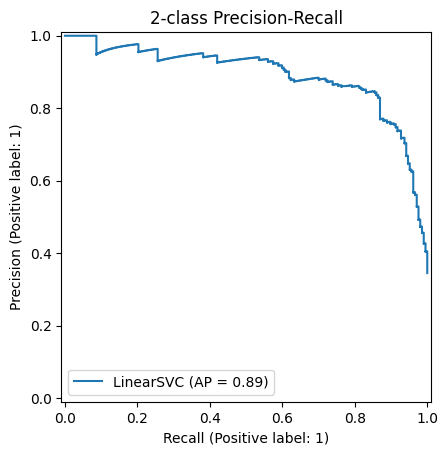

In [41]:
display = PrecisionRecallDisplay.from_estimator(
    model_pipeline, test_df['comment'], test_df['toxic'], name='LinearSVC'
)
_ = display.ax_.set_title('2-class Precision-Recall')

In [42]:
import numpy as np

In [43]:
np.where(prec > 0.95)

(array([515, 516, 517, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
        553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
        566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 580,
        581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593,
        594, 595, 596, 597, 598]),)

In [44]:
tresholds[515]

np.float64(0.6786061062623528)

In [52]:
model_pipeline.predict(test_df['comment']) > tresholds[515]

array([False,  True, False,  True, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
        True, False,

In [53]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']) > tresholds[597])

0.8733333333333333

In [55]:
grid_pipeline = Pipeline(
    [
        ('vectorizer', TfidfVectorizer(tokenizer= lambda x : sentence_tokenize(x))),
        ('model', GridSearchCV(
            LogisticRegression(random_state=0),
            param_grid={'C': [0.1, 1, 10]},
            cv=3,
            verbose=4
        ))
    ]
)

In [56]:
grid_pipeline.fit(train_df['comment'], train_df['toxic'])

c:\Users\danni\miniconda3\envs\toxiccomsenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.688 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.685 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.0s
[CV 1/3] END ...............................C=1;, score=0.838 total time=   0.1s
[CV 2/3] END ...............................C=1;, score=0.830 total time=   0.1s
[CV 3/3] END ...............................C=1;, score=0.837 total time=   0.0s
[CV 1/3] END ..............................C=10;, score=0.869 total time=   0.2s
[CV 2/3] END ..............................C=10;, score=0.863 total time=   0.2s
[CV 3/3] END ..............................C=10;, score=0.864 total time=   0.2s


,steps,"[('vectorizer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,<function <la...00272A9DC9C60>


In [57]:
prec, rec, tresholds = precision_recall_curve(test_df['toxic'], grid_pipeline.predict_proba(test_df['comment'])[:,1])

In [58]:
np.where(prec > 0.95)

(array([513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
        526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538,
        539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551,
        552, 553, 554, 555, 556, 557, 560, 561, 562, 563, 564, 565, 566,
        567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579,
        580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,
        593, 594, 595, 596, 597, 598]),)

In [59]:
precision_score(y_true=test_df['toxic'], y_pred=grid_pipeline.predict(test_df['comment']) > tresholds[513])

0.8735632183908046

In [60]:
recall_score(y_true=test_df['toxic'], y_pred=grid_pipeline.predict(test_df['comment']) > tresholds[513])

0.7342995169082126